In [1]:
# import numpy and pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#% matplotlib inline

#load the file 'KaggleV2-May-2016.csv'
df = pd.read_csv('KaggleV2-May-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [2]:
#identify the duplicated rows in the data frame
sum(df.duplicated())

0

In [3]:
#describe the statistics in columns of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
#removing the row with unwanted data
df.drop(df.query("Age==-1").index,inplace = True)
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [5]:
# checking the data description after cleaning the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474932e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560937e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# Finding out the age column in the data
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [7]:
#classifying the female and male in the column 'Gender'
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [8]:
#calculating the percentage of female in the data
df[df['Gender']=="F"]['Gender'].count()/df['Gender'].count()*100


64.99737618297956

In [9]:
#calculating the percentage of male in the data
df[df['Gender']=="M"]['Gender'].count()/df['Gender'].count()*100


35.00262381702043

<AxesSubplot:>

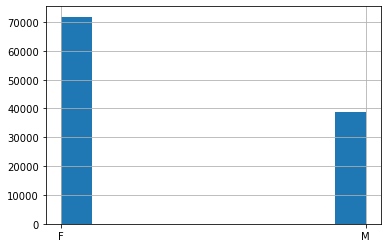

In [10]:
#Visualizing the 'Gender' of the data
df['Gender'].hist()

<AxesSubplot:ylabel='Gender'>

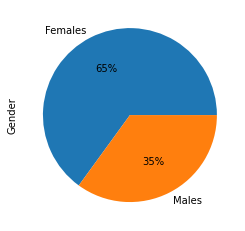

In [11]:
df["Gender"].value_counts().plot(kind="pie",labels=["Females","Males"],autopct='%1.0f%%')

In [12]:
# identify the cases of postponing the appointments
# Identify the male number that not showing at the appointments
# Calculating the male number that not showing at the appointments
df_notshow= df['No-show']=='Yes'
M_notshow=df[df['Gender']=='M'][df['No-show']=='Yes']['PatientId']
M_notshow.count()



<ipython-input-12-b998ae2c5dec>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  M_notshow=df[df['Gender']=='M'][df['No-show']=='Yes']['PatientId']


7725

In [13]:
# Calculating the percentage of male number that not showing at the appointments
M_notshow.count()/df[df['Gender']=='M']['PatientId'].count()*100

19.967947889471915

In [14]:
# Calculating the female number that not showing at the appointments
F_notshow=df[df['Gender']=='F'][df['No-show']=='Yes']['PatientId']
F_notshow.count()

<ipython-input-14-cdf15fce34a3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  F_notshow=df[df['Gender']=='F'][df['No-show']=='Yes']['PatientId']


14594

In [15]:
# Calculating the percentage of female number that not showing at the appointments
F_notshow.count()/df[df['Gender']=='F']['PatientId'].count()*100

20.314870752655242

In [16]:
# specifying the patients having the wellfare program 

Enrolled = df.Scholarship==True
df[df.Scholarship==True]['No-show'].count()



10861

In [17]:
# calculating the percentage of the patients having the wellfare program 

Enrolled = df.Scholarship==True
df[df.Scholarship==True]['No-show'].count()/df['Scholarship'].count()*100


9.826647123753688

In [18]:
# specifying the patients that not having the wellfare program 

Not_Enrolled=df.Scholarship==False
df[df.Scholarship==False]['No-show'].count()

99665

In [19]:
# calculating the percentage of the patients not having the wellfare program 

Not_Enrolled=df.Scholarship==False
df[df.Scholarship==False]['No-show'].count()/df['Scholarship'].count()*100

90.17335287624631

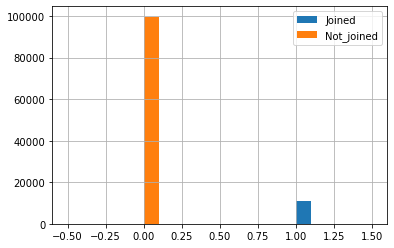

In [20]:
# visualizing the patients joining and not joining the wellfare program

Enrolled = df.Scholarship==True
Not_Enrolled=df.Scholarship==False
df.Scholarship[df.Scholarship==True].hist(label='Joined')
df.Scholarship[df.Scholarship==False].hist(label='Not_joined')
plt.legend()


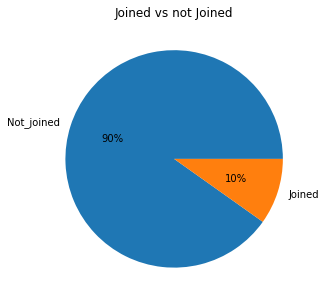

In [21]:

df['Scholarship'].value_counts().plot(kind="pie",labels=["Not_joined","Joined"],autopct='%1.0f%%',figsize=(10,5))

plt.ylabel("")
plt.title("Joined vs not Joined");


In [22]:
# identify the patients joining the wellfare program and not showing up at the appointments

Enrolled = df.Scholarship==True
df[df.Scholarship==True][df['No-show']=='Yes']['PatientId'].count()

<ipython-input-22-08685b3398bb>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.Scholarship==True][df['No-show']=='Yes']['PatientId'].count()


2578

In [23]:
# identify the percentage of the patients joining the wellfare program and not showing up at the appointments

Enrolled = df.Scholarship==True
df[df.Scholarship==True][df['No-show']=='Yes']['PatientId'].count()/df[df.Scholarship==True]['PatientId'].count()*100

<ipython-input-23-338f7403fd8e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.Scholarship==True][df['No-show']=='Yes']['PatientId'].count()/df[df.Scholarship==True]['PatientId'].count()*100


23.73630420771568

In [24]:
# identify the patients joining the wellfare program and not showing up at the appointments

Enrolled = df.Scholarship==False
df[df.Scholarship==False][df['No-show']=='Yes']['PatientId'].count()

<ipython-input-24-dadd9ffad6db>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.Scholarship==False][df['No-show']=='Yes']['PatientId'].count()


19741

In [25]:
# identify the percentage of the patients not joining the wellfare program and not showing up at the appointments

Enrolled = df.Scholarship==False
df[df.Scholarship==False][df['No-show']=='Yes']['PatientId'].count()/df[df.Scholarship==False]['PatientId'].count()*100

<ipython-input-25-50e26164220c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.Scholarship==False][df['No-show']=='Yes']['PatientId'].count()/df[df.Scholarship==False]['PatientId'].count()*100


19.807354638037424